In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

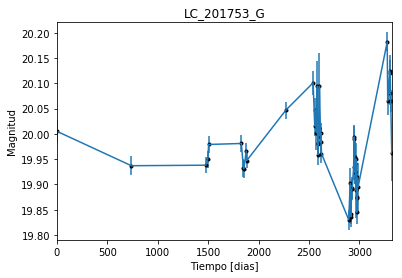

In [2]:
data = np.genfromtxt('LC_201753_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_201753_G')
plt.savefig("LC_201753_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

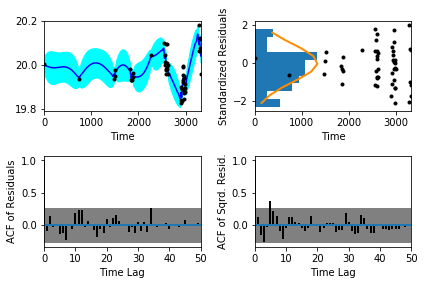

In [5]:
sample.assess_fit()

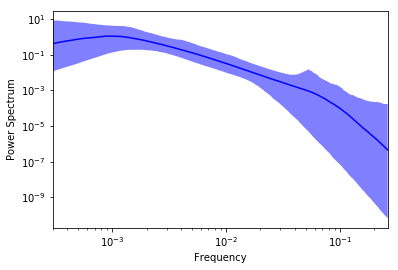

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

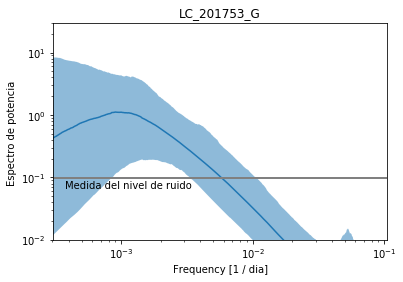

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_201753_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_201753_G')

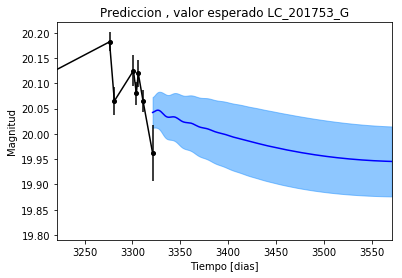

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_201753_G')

Text(0.5,1,'Prediccion, Caminos simulados LC_201753_G')

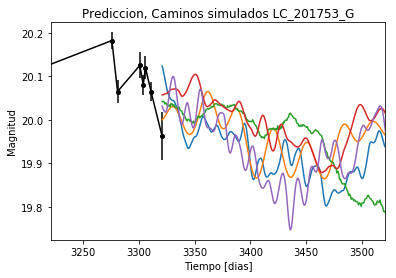

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_201753_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


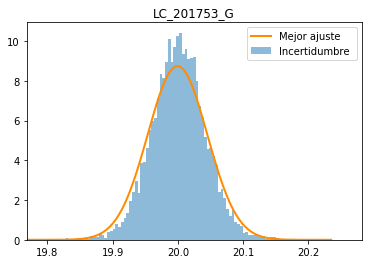

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_201753_G')
plt.savefig("Mejor_ajuste_LC_201753_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_201753_G')

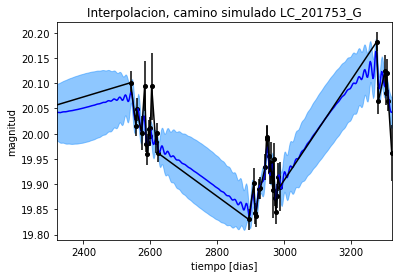

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_201753_G')

Text(0.5,1,'Interpolacion, camino simulado LC_201753_G')

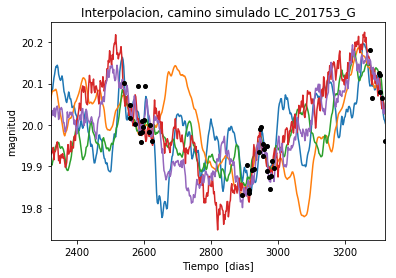

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_201753_G')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 362.544999098
Median: 0.0232452274702
Standard deviation: 0.116469578438
68% credibility interval: [ 0.0038447   0.17303389]
95% credibility interval: [ 0.00061791  0.44151485]
99% credibility interval: [  3.47493848e-04   5.05366209e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 218.527122233
Median: 0.00885505274255
Standard deviation: 0.0800543308487
68% credibility interval: [ 0.00100121  0.06757249]
95% credibility interval: [ 0.000387    0.31442301]
99% credibility interval: [  3.15424788e-04   4.77955266e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 264.702317242
Median: 0.0115183862607
Standard deviation:

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 480.646323033
Median: 106.612696635
Standard deviation: 1.96845921804
68% credibility interval: [ 104.52548841  108.3187939 ]
95% credibility interval: [ 101.83202884  109.82715173]
99% credibility interval: [  99.9465132   110.32290407]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 459.62276334
Median: 0.721771974003
Standard deviation: 1.38009901733
68% credibility interval: [ 0.12407582  2.65189074]
95% credibility interval: [ 0.01494663  4.95426123]
99% credibility interval: [ 0.01366358  6.40066979]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 440.340496405
Median: 0.557905346305
Standard deviation: 3.369793862
68% credibility interval: [ 0.11097992  5.32724475]
95% credibility interval: [  0.01261795  10.9

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 5072.32811396
Median: 9.96134287637e+13
Standard deviation: 8.7834490434e+112
68% credibility interval: [  5.00400437e-29   9.23110112e+40]
95% credibility interval: [  1.28416333e-91   2.06112782e+99]
99% credibility interval: [  3.89753179e-142   2.87746471e+111]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2132.41191821
Median: 19.9846907917
Standard deviation: 0.0275837835381
68% credibility interval: [ 19.96114144  20.00779698]
95% credibility interval: [ 19.92862111  20.03804683]
99% credibility interval: [ 19.89568937  20.0703396 ]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 423.548085061
Median: 0.0593279563095
Standard deviation: 0.147908446194
68% credibility interval: [ 0.          0.32324982]
95% credibility interval: [ 0.          0.48347919]
99% credibility interval: [ 0.          0.51851922]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 423.548085061
Median: 0.0593279563095
Standard deviation: 0.147908446194
68% credibility interval: [ 0.          0.32324982]
95% credibility interval: [ 0.          0.48347919]
99% credibility interval: [ 0.          0.51851922]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1492.01497658
Median: 0.0
Standard deviation: 0.000863948775964
68% cr

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 480.646323033
Median: 106.612696635
Standard deviation: 1.96845921804
68% credibility interval: [ 104.52548841  108.3187939 ]
95% credibility interval: [ 101.83202884  109.82715173]
99% credibility interval: [  99.9465132   110.32290407]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 874.59206095
Median: 0.00702751202681
Standard deviation: 0.0052672061263
68% credibility interval: [ 0.00460645  0.01175649]
95% credibility interval: [ 0.00308515  0.02242958]
99% credibility interval: [ 0.00246694  0.03462617]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 797.599894488
Median: 1.07506306092
Standard deviation: 0.206498715978
68% credibility interval: [ 0.89523512  1.29105752]
95% credibility interval: [ 0.7504187  1.5627307]
99% credibility interval: [ 0.68262067  1.76619436]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 469.251769723
Median: 7.03180459488e-17
Standard deviation: 0.0305428818038
68% credibility interval: [  7.04041546e-44   3.32695510e-03]
95% credibility interval: [  1.39730122e-102   7.80032421e-002]
99% credibility interval: [  4.31997594e-114   2.22375455e-001]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 362.544999098
Median: (-0.146054071703-0.565587398036j)
Standard deviation: 1.18287653029
68% credibility interval: [-1.08720398-0.39234347j -0.02415695-2.67763612j]
95% credibility interval: [-2.77411963+0.j         -0.00388247-2.30343545j]
99% credibility interval: [ -3.17530954e+00-2.33702739j  -2.18336824e-03-0.00672231j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 218.527122233
Median: (-0.0556379372863+0.303597216568j)
Standard deviation: 1.0567265022
68% credibility interval: [-0.42457048+0.89460491j -0.00629076+0.j        ]
95% credibility interval: [-1.97557806+1.54691809j -0.00243157+0.j        ]
99% credibility interval: [ -3.00308150e+00+1.25337888j  -1.98187239e-03+0.j        ]
Posterior summary for pa